## Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and
rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling 
online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount,
Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that 
are eligible for loan amount so that they can specifically target these customers. 



#### Import data

In [2]:
import pandas as pd
train = pd.read_csv(r'C:\Users\Prasad\Downloads\train_ctrUa4K.csv')
test = pd.read_csv(r'C:\Users\Prasad\Downloads\test_lAUu6dG.csv')
data = train.append(test)

C:\Users\Prasad\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [4]:
#join data
print(train.shape)
print(test.shape)
print(data.shape)

(614, 13)
(367, 12)
(981, 13)


In [5]:
#importing libraries
import numpy as np
import pandas as pd
from math import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib as plt
from sklearn.metrics import mean_squared_error, r2_score

#### checking null values

In [6]:
data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
dtype: int64

###  categorical data preprocessing

In [20]:
replace = data.Gender.value_counts().argmax()
data['Gender'].fillna(replace, inplace=True) 
replace = data.Married.value_counts().argmax()
data['Married'].fillna(replace, inplace=True) 
replace = data.Dependents.value_counts().argmax()
data['Dependents'].fillna(replace, inplace=True)
replace = data.Self_Employed.value_counts().argmax()
data['Self_Employed'].fillna(replace, inplace=True)
replace = data.LoanAmount.value_counts().argmax()
replace = data.Loan_Status.value_counts().argmax()
data['Loan_Status'].fillna(replace, inplace=True)

C:\Users\Prasad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.
C:\Users\Prasad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Prasad\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, u

In [22]:
print(data['Gender'].unique())
print(data['Married'].unique())
print(data['Dependents'].unique())
print(data['Self_Employed'].unique())
print(data['Loan_Status'].unique())

[1 0]
[0 1]
[0 1 2 3]
[0 1]
['Y' 'N']


### Numerical data preprocessing

In [23]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
data[['LoanAmount']] = imputer.fit_transform(data[['LoanAmount']])
imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
data[['Loan_Amount_Term']] = imputer.fit_transform(data[['Loan_Amount_Term']])
imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
data[['Credit_History']] = imputer.fit_transform(data[['Credit_History']])

C:\Users\Prasad\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Prasad\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Prasad\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [24]:
data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
Credit_History       0
Dependents           0
Education            0
Gender               0
LoanAmount           0
Loan_Amount_Term     0
Loan_Status          0
Married              0
Property_Area        0
Self_Employed        0
dtype: int64

#### Label encoding 

In [26]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
data['Gender']= label_encoder.fit_transform(data['Gender'])
data['Married']= label_encoder.fit_transform(data['Married'])
data['Dependents']= label_encoder.fit_transform(data['Dependents'])
data['Education']= label_encoder.fit_transform(data['Education'])
data['Self_Employed']= label_encoder.fit_transform(data['Self_Employed'])
data['Property_Area']= label_encoder.fit_transform(data['Property_Area'])
data['Loan_Status']= label_encoder.fit_transform(data['Loan_Status'])


### Important feature selection 

C:\Users\Prasad\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1.80110399e-02 5.15232849e-03 1.19754114e-03 3.13417592e-03
 3.04829707e-03 2.26406033e-03 8.16087335e-03 3.33807062e-03
 5.27168456e-04 2.23581080e-03 4.19394494e-03 9.48736689e-01]


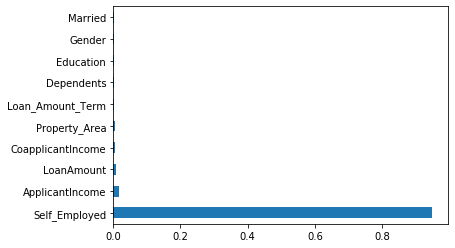

In [27]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data.iloc[:,0:12]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### dropping unneccesary columns

In [28]:
drp=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Property_Area']
data.drop(drp,inplace=True, axis=1)

C:\Users\Prasad\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.35141239 0.18748659 0.15210834 0.30899268]


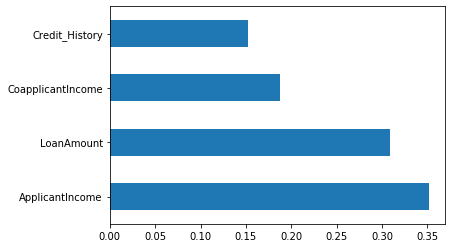

In [29]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data.iloc[:,0:4]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### EDA

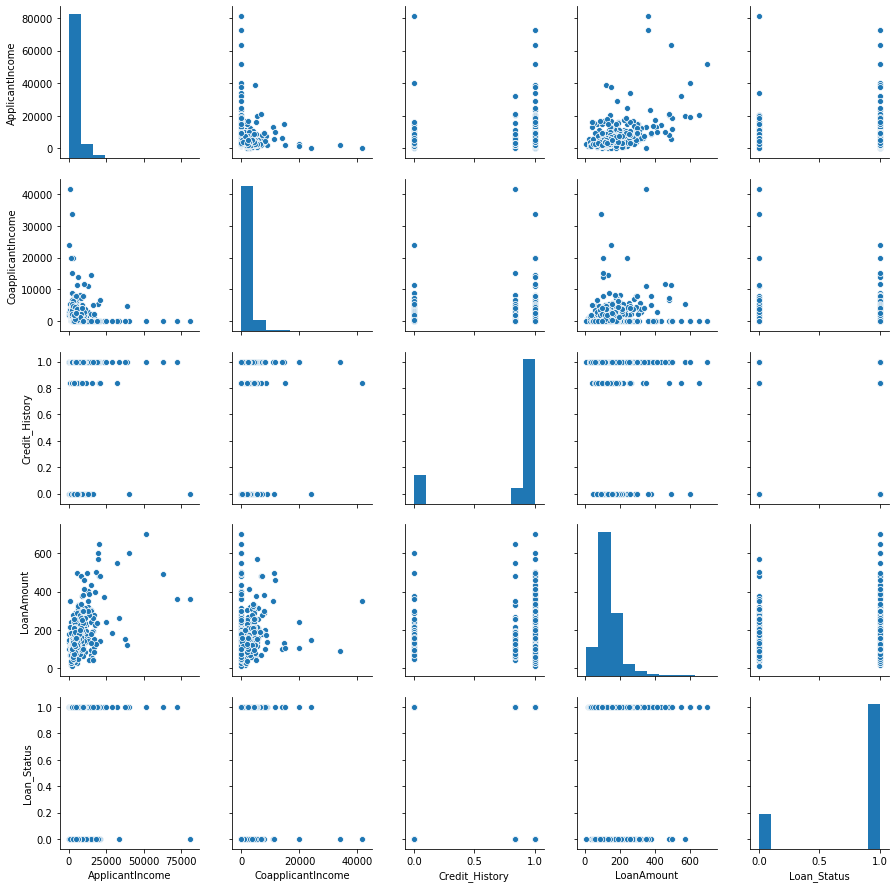

In [30]:
import seaborn as sns
sns.pairplot(data)

### model fit

In [32]:
import pandas as mypd
from sklearn import tree 
mymodel = tree.DecisionTreeClassifier(min_samples_split = 10)
mymodel.fit(X,y) 
mymodel.score(X,y)


0.9123343527013251

In [33]:
pred = mymodel.predict(X) 
mytable = mypd.crosstab(y, pred) 
mytable


col_0,0,1
Loan_Status,,
0,134,58
1,28,761


In [34]:
print(len(pred))

981


### Train and Test split

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.374, random_state = 100)

### Training accurary check

In [72]:
mymodel = tree.DecisionTreeClassifier(min_samples_split=50) 
mymodel.fit(x_train, y_train)
mymodel.score(x_train, y_train)


0.8485342019543974

In [73]:
pred = mymodel.predict(x_train)
mytable = mypd.crosstab(y_train, pred)
mytable


col_0,0,1
Loan_Status,,
0,66,61
1,32,455


### Test predection 

In [74]:
pred_test = mymodel.predict(x_test)
mytesttable = mypd.crosstab(y_test, pred_test) 
mytesttable


col_0,0,1
Loan_Status,,
0,18,47
1,42,260


In [75]:
print(len(pred_test))

367


### submission file

In [76]:
test1= pd.read_csv(r'C:\Users\Prasad\Downloads\test_lAUu6dG.csv')
loan_id=test1['Loan_ID']
loan_status=pred_test

In [78]:
submission=pd.DataFrame({'Loan_ID':loan_id,'Loan_Status':loan_status})
submission.to_csv('classifivation.csv',index=False)